# Depth-first search (DFS) 

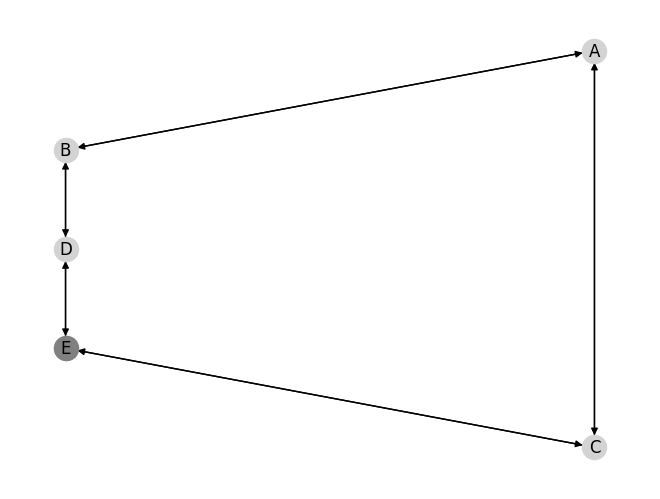

In [31]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
#G={'A':['B','C'],'B':['D','E'],'C':['E'],'D':['E']}
G={'A':['C','B'],'B':['D','A'],'C':['E','A'], 'D':['E','B'],'E':['D','C']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## BFS algorithm
DFS(G,source,maxd)  
> if Target(source) return source  
> if maxd == 0 return NULL  
> for n $\in$ Adjacents(G,s)  
>> if (r = DFS(G,n,maxd-1)) != NULL  
>>> return r  
> return NULL

### DFS implementation returning the target node that was reached

In [24]:
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# target is the list of target nodes
def dfs(G, source, Target):
  Open = [source]
  Closed = []
  while Open != []:
    node = Open.pop(-1)
    if node in Target: return node
    Closed.append(node)
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          Open.append(child)
  return None
      
print(dfs(G,'A',Target))

E


### DFS implementation graphically showing the sequence of nodes visited

E


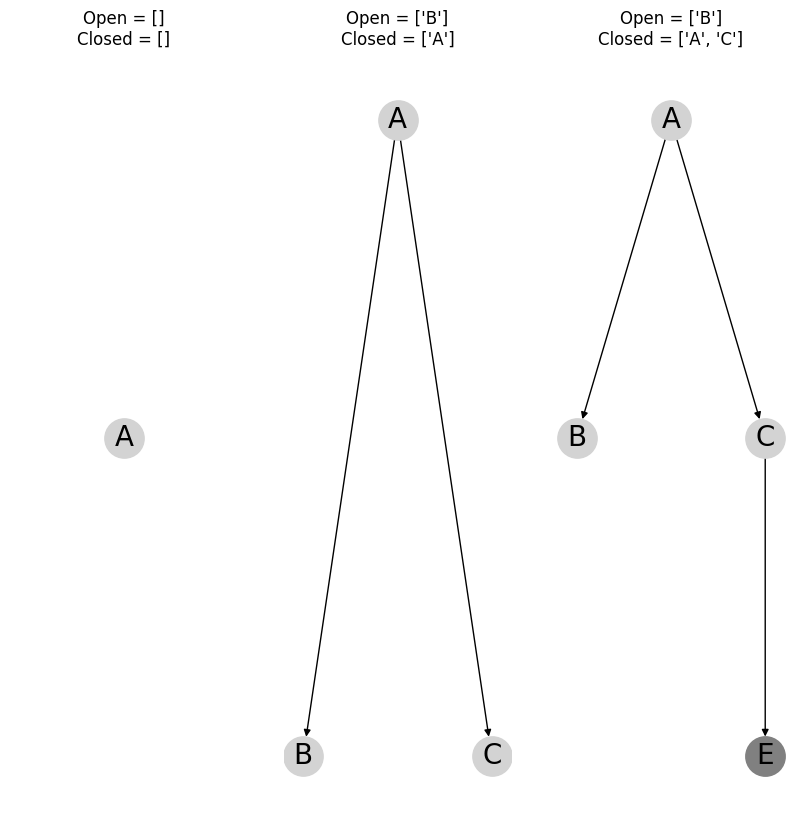

In [30]:
import matplotlib.pyplot as plt

nrows=1; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
axes = iter(fig.axes)
DG={source:[]}

def draw_graph(DG, source, Open, Closed, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# Target is the list of target nodes
def dfs(G, source, Target):
  DG={source:[]}
  Open = [source]
  Closed = []
  while Open != []:
    node = Open.pop(-1)
    if node in Target: 
      draw_graph(DG, source, Open, Closed, [node])
      return node
    draw_graph(DG, source, Open, Closed)
    Closed.append(node)
    Adj = DG[node]
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          Adj.append(child); DG[node]=Adj
          DG.update({child:[]})
          Open.append(child)
  return None

print(dfs(G,'A',Target))
